In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import copy
import matplotlib.pyplot as plt
import torch.nn.functional as F
import sys

In [2]:
fig_hparam = {
    'figsize': (8, 5),
    'labelsize': 28,
    'ticksize': 20,
    'linewidth': 2,
    'fontsize': 15,
    'titlesize': 20,
    'markersize': 15
}

# font specification
fontdict = {'family': 'serif',
         'size': fig_hparam['fontsize'],
         }

## Load results for different dilation values

In [3]:
result_dir = '../results2/linear_regression_loop'
# Specify the run ids !
run_ids = [
    "dil_1",
    "dil_2",
    "dil_3",
    "dil_4",
]
file_logs = "wandb/latest-run/files/wandb-summary.json"

In [4]:
import json

dd_summ = {}

for run_id_ in run_ids:
    filepath = os.path.join(result_dir, run_id_, file_logs)
    with open(filepath) as f:
        summary = json.load(f)

    dd_summ[run_id_[-1]] = summary['pointwise/loss']

## Plot loss over in-context samples

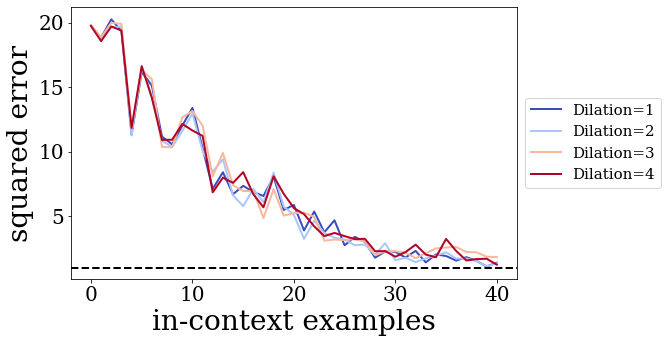

In [6]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])

cmap = matplotlib.cm.get_cmap("coolwarm")
colors = cmap(np.linspace(0, 1, len(dd_summ)))
for i, (key_, loss_vals_) in enumerate(dd_summ.items()):
    ax.plot(loss_vals_.values(), color=colors[i], lw=fig_hparam['linewidth'], label=f"Dilation={key_}")

ax.tick_params(axis='both', labelsize=fig_hparam['ticksize'])
ax.axhline(1, color='k', ls='--', lw=fig_hparam['linewidth'])
# ax.set_ylim(-0.1, 1.25)
# plt.xticks(np.arange(0, n_points))
plt.rc('font', family='serif')
ax.set_xlabel("in-context examples", fontsize=fig_hparam['labelsize'])
y_label = ax.set_ylabel("squared error", fontsize=fig_hparam['labelsize'])
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fig_hparam['fontsize'])


plt.savefig("result_folder/Figures/LR_err_dilated.png", format='png', dpi=600, bbox_inches='tight')

plt.show()